# Red wine quality prediction project
Project Description:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.




In [1]:
#importing the library's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Load the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Attribute Information!

• Fixed acidity: Nonvolatile, volatile acids of Wine (do not evaporate readily)

• Volatile acidity: The amount of acetic acid in Wine

• Citric acid: Adds flavour to Wine and is found in small quantities.

• Residual sugar: Sugar content after fermentation stops

• Chlorides: Residual Salt in the Wine

• Free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular S02 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of Wine

• Total sulfur dioxide: Amount of free and bound forms of S02

• Density: The density of a substance is its mass per unit volume

• PH: Describes how acidic or basic a substance is on a scale from 0 to 14
Learning

• Sulfates: a wine additive that can contribute to sulfur dioxide gas (S02) levels

• Alcohol: Percentage of alcohol content in the Wine

• Quality: Score between 0 and 10

These are the parameters in the dataset

In [3]:
#Description of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#checkeing
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Exploratory Data Analysis

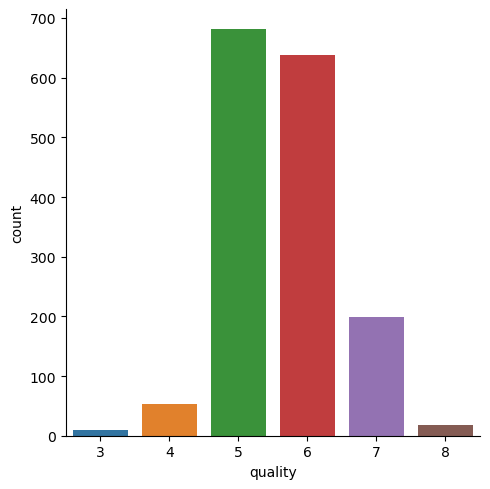

In [23]:
sb.catplot(x='quality',data = df,kind = 'count')
plt.show()

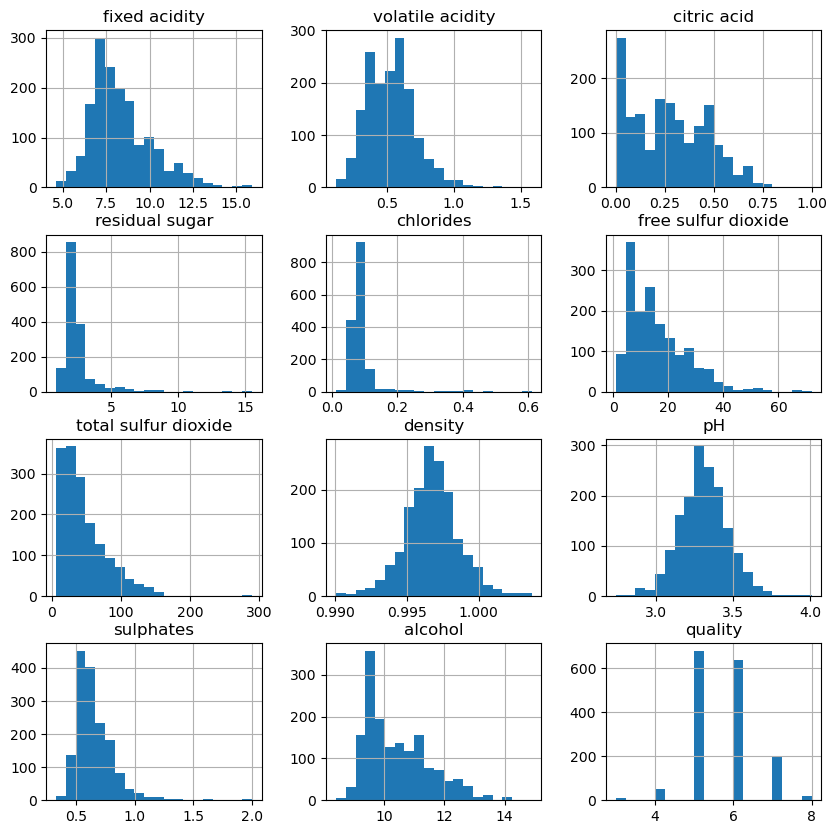

In [24]:
df.hist(bins = 20, figsize = (10,10))
plt.show()

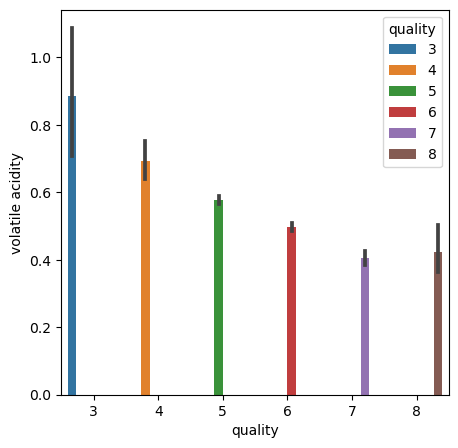

In [25]:
plt.figure(figsize= (5,5))
sb.barplot(x= 'quality',y = 'volatile acidity',data = df,hue = 'quality')
plt.show()

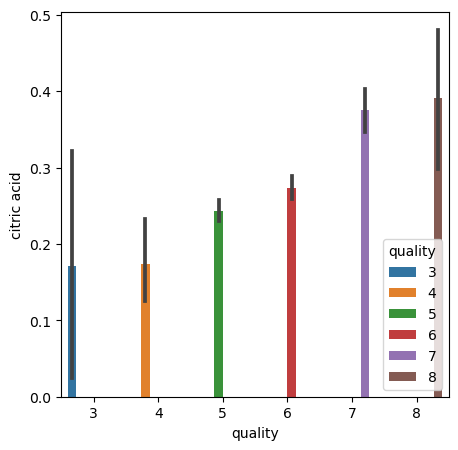

In [7]:
plt.figure(figsize= (5,5))
sb.barplot(x= 'quality',y = 'citric acid',data = df,hue = 'quality')
plt.show()

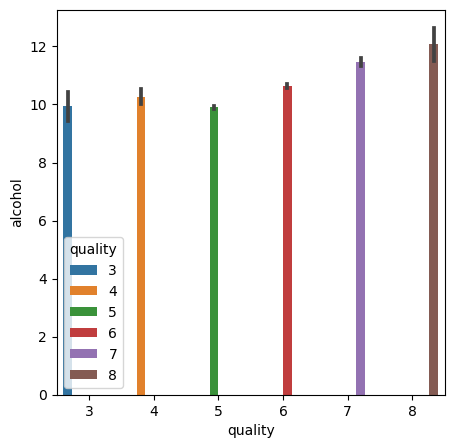

In [8]:
plt.figure(figsize= (5,5))
sb.barplot(x= 'quality',y = 'alcohol',data = df,hue = 'quality')
plt.show()

From the above graphs wee can see that the wine quality is positively related to alcohol and citric acid 

and it is negitively related to volatile acidity. we can confirm that using a heatmap


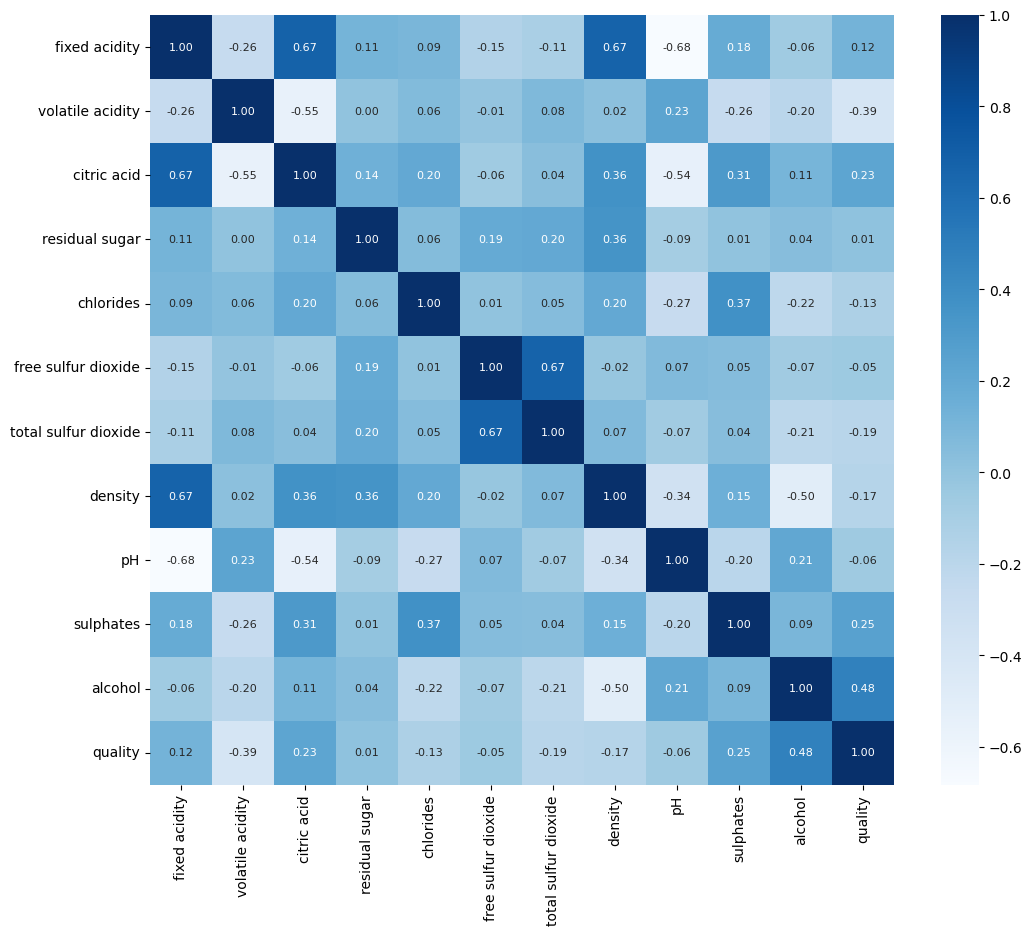

In [27]:
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(),cbar = True,fmt = '.2f',annot = True,annot_kws = {'size':8},cmap = 'Blues')
plt.show()

Wine quality is high when higher the alcohol,citric acid and sulphates.

On the other hand wines with high volatile acidity,density and ph are low in quality

Wines quality has no significant relationship with total sulfur dioxide,free sulfur dioxide,chloreds,residual sugar and fixed acidity

Model Building

 Some regression algorithms for predicting the wine quality

 *Decision Tree Regressor
 
 *Linear Regression 

 *Random Forest Regressor

In [6]:
x = df.drop('quality',axis = 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
y= df['quality'].apply(lambda qual : 1 if qual >=7 else 0)

Dividing the Dataset to training and testing set

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [9]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (1119, 11)
y_train (1119,)
x_test (480, 11)
y_test (480,)


Decision Tree :

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_prediction = dtree.predict(x_test)
print(classification_report(y_test,dtree_prediction))


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.51      0.63      0.56        67

    accuracy                           0.86       480
   macro avg       0.72      0.76      0.74       480
weighted avg       0.88      0.86      0.87       480

0.8625


Logistic Regression :

In [19]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train)
lreg_prediction = lreg.predict(x_test)
lreg_accuracy = accuracy_score(lreg_prediction,y_test)
print(' Accuracy is :',lreg_accuracy*100)

 Accuracy is : 86.66666666666667


Random Forest :


In [21]:
frost = RandomForestClassifier()
frost.fit(x_train,y_train)
frost_prediction = frost.predict(x_test)
frost_accuracy = accuracy_score(frost_prediction,y_test)
print(frost_accuracy*100)


 Accuracy is : 88.125
